In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Dict, Tuple
import copy
import time
import numpy as np
from joblib import Parallel, delayed
from itertools import combinations, product
from queue import PriorityQueue, Empty
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Dict, Tuple
import copy
import numpy as np
from helpers import *
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
nodes, costs, D = read_data('TSPA.csv')

In [3]:
initial = random_sequence(D)
path = local_search(initial, costs, D)
evaluate(D, path, costs)

79539

In [12]:
def common_edges(path1, path2):
    counter = 0
    for idx, edge_start in enumerate(path1):
        edge_end = path1[(idx+1) % len(path1)]
        if edge_start in path2:
            e_idx = path2.index(edge_start)
            if edge_end == path2[(e_idx+1) % len(path2)] or \
               edge_end == path2[(e_idx-1) % len(path2)]: # opposite edge order
                counter += 1
    return counter

def common_nodes(path1, path2):
    counter = 0
    for node in path1:
        if node in path2:
            counter += 1
    return counter

In [40]:
from joblib import Parallel, delayed
import pandas as pd

def generate_optima_single(instance, N=10):
    _, costs, D = read_data(f'TSP{instance}.csv')
    paths = []
    scores = []
    for x in range(N):
        initial_path = random_sequence(D)
        path = local_search(initial_path, costs, D)
        score = evaluate(D, path, costs)
        paths.append(path)
        scores.append(score)
    data = {'Path': paths, 'Score': scores}
    df = pd.DataFrame(data)
    df.to_csv(f'TSP{instance}_out.csv', index=False)

def generate_optima_parallel(N=10):
    instances = ['A', 'B', 'C', 'D']
    Parallel(n_jobs=-1)(delayed(generate_optima_single)(instance, N) for instance in instances)

# Call the parallelized function
# generate_optima_parallel(1000)

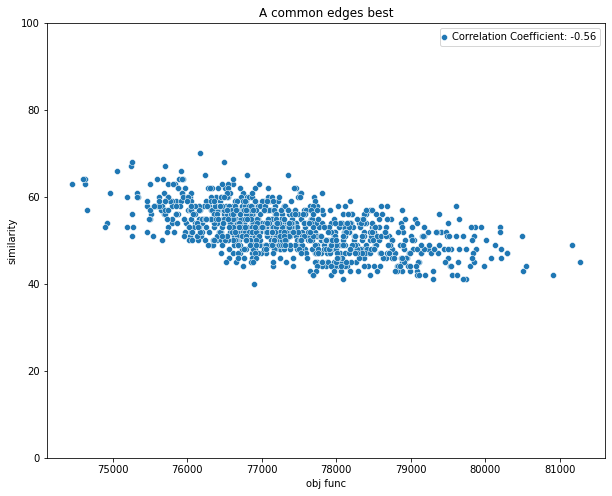

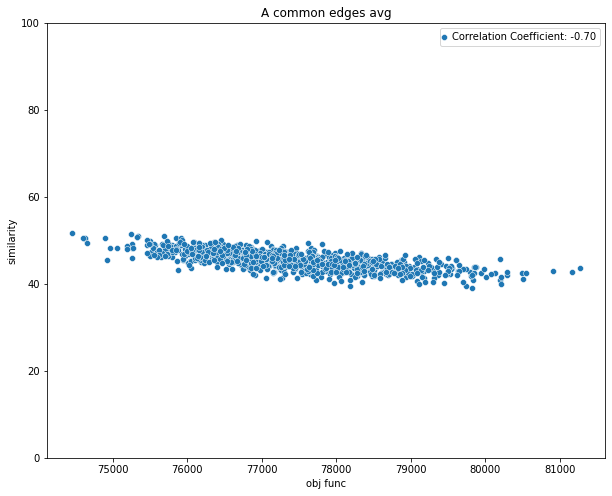

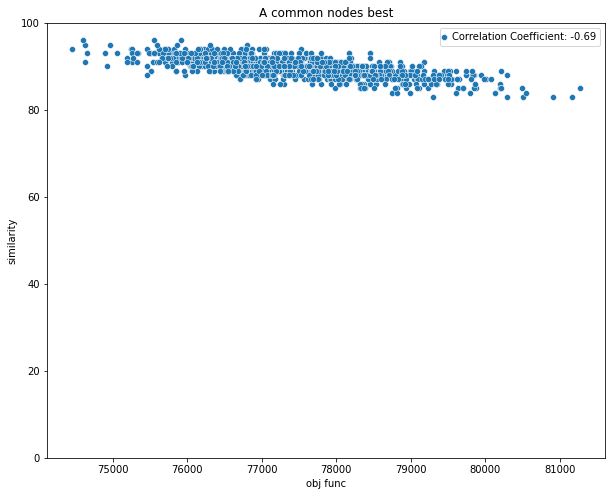

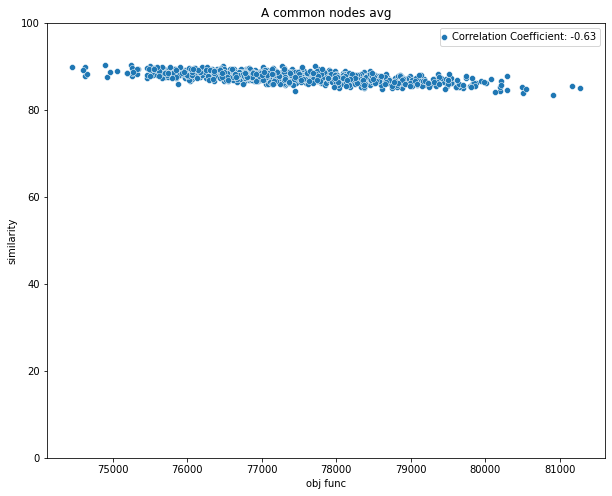

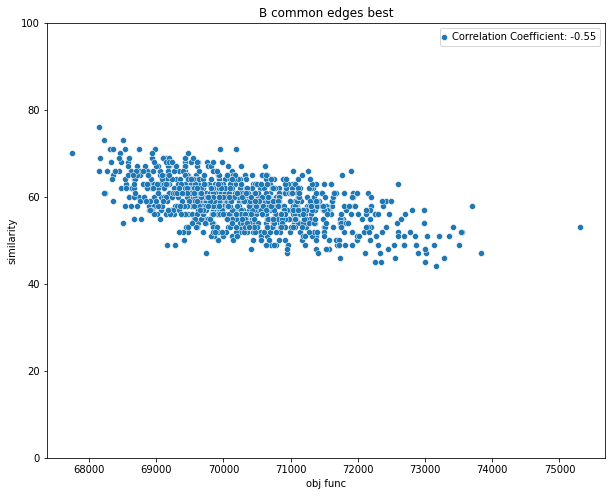

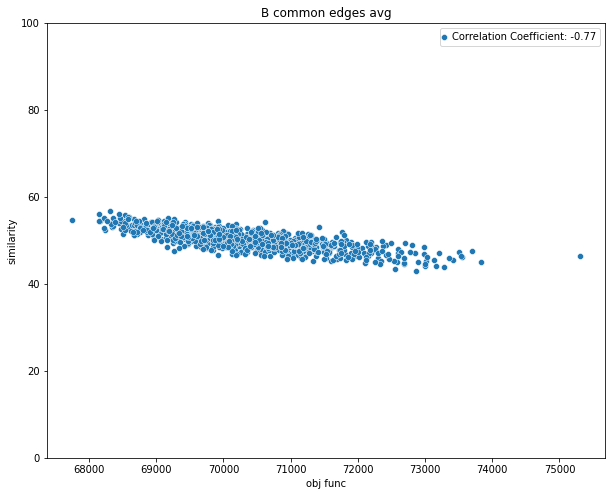

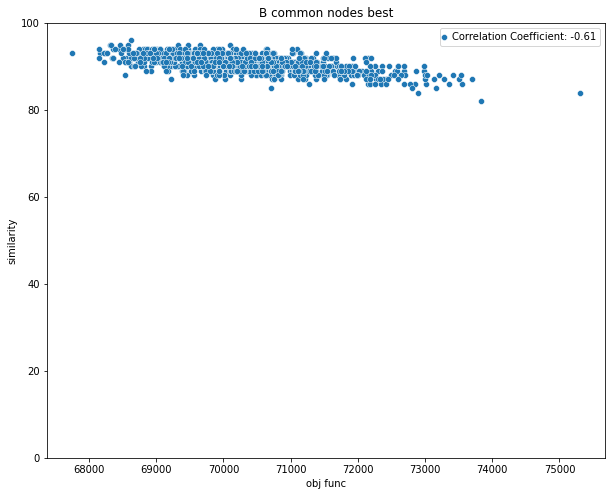

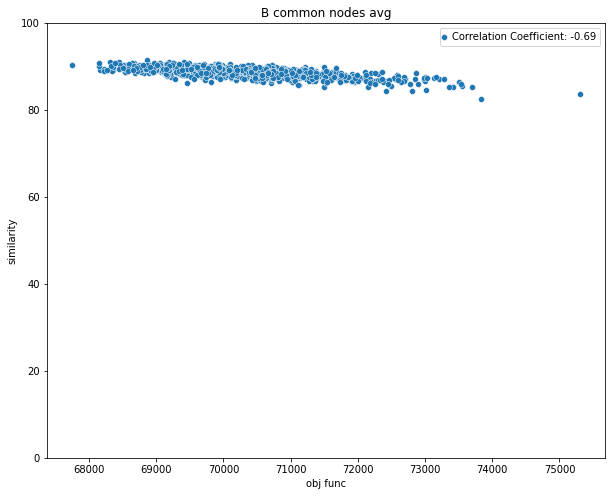

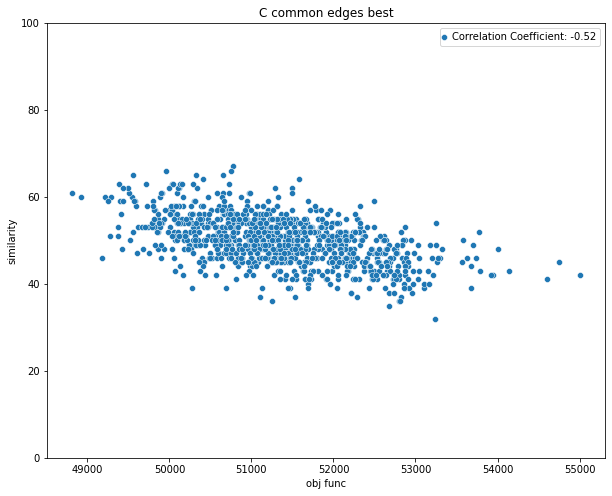

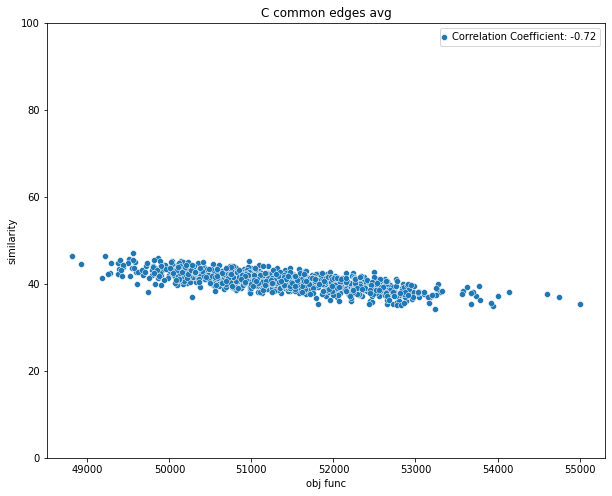

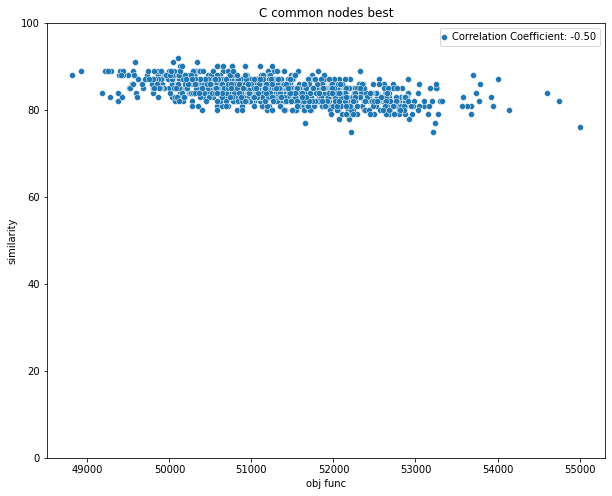

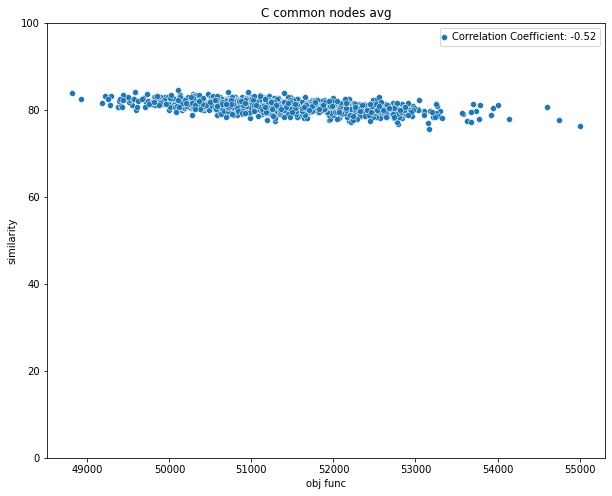

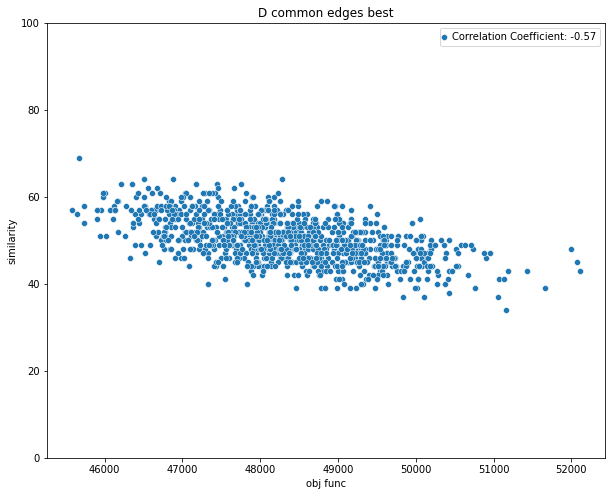

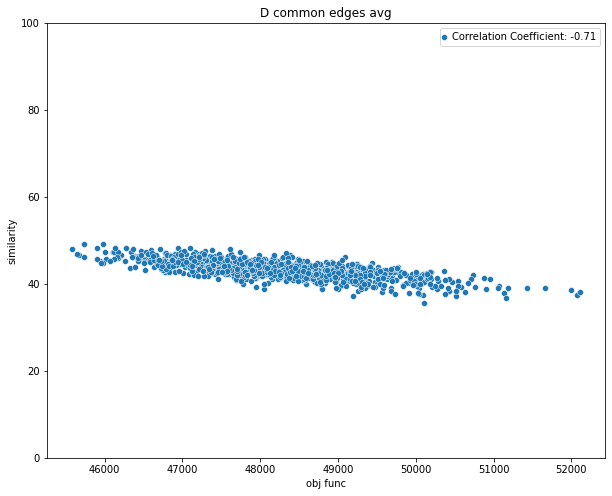

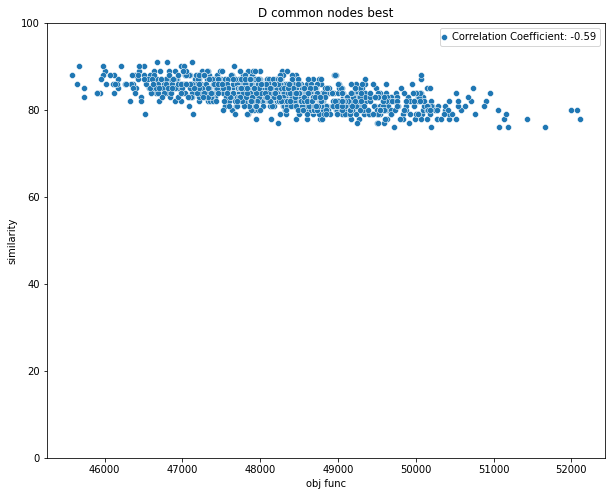

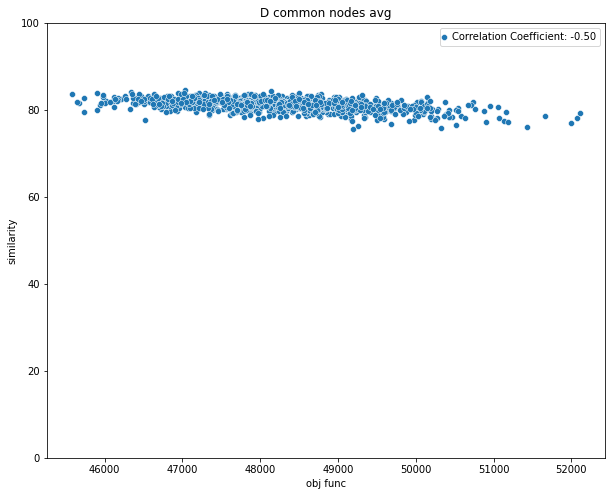

In [94]:
def plot(x, y, cor, title):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=x, y=y)
    plt.xlabel('obj func')
    plt.ylabel('similarity')
    plt.legend([f'Correlation Coefficient: {cor:.2f}'], fontsize=10, handlelength=0)
    plt.title(title)
    plt.ylim(0, 100)
    plt.show()

sim_mapping = {
    "common edges": common_edges,
    "common nodes": common_nodes
}

def generate_plots():
    instances = ['A', 'B', 'C', 'D']
    for instance in instances:
        for sim_type in ["common edges", "common nodes"]:
            sim = sim_mapping[sim_type]
            for target in ['best', 'avg']:
                sims = []
                data = pd.read_csv(f'TSP{instance}_out.csv', sep=',')
                paths = []
                scores = []
                for index, row in data.iterrows():
                    str_path, score = row['Path'], row['Score']
                    path = [int(x) for x in str_path[1:-1].split()]
                    paths.append(path)
                    scores.append(score)
                if target == 'avg':
                    for idx, path1 in enumerate(paths):
                        similarity_scores = []
                        for path2 in paths:
                            if path1 != path2:
                                sim_score = sim(path1, path2)
                                similarity_scores.append(sim_score)
                        avg_sim = sum(similarity_scores)/len(similarity_scores)
                        sims.append(avg_sim)
                else:
                    best_path = best_paths[instance]
                    for idx, path in enumerate(paths):
                        similarity = sim(path, best_path)
                        sims.append(similarity)
                correlation_coefficient, _ = pearsonr(scores, sims)
                plot(scores, sims, correlation_coefficient, f'{instance} {sim_type} {target}')

generate_plots()



Plot global optima

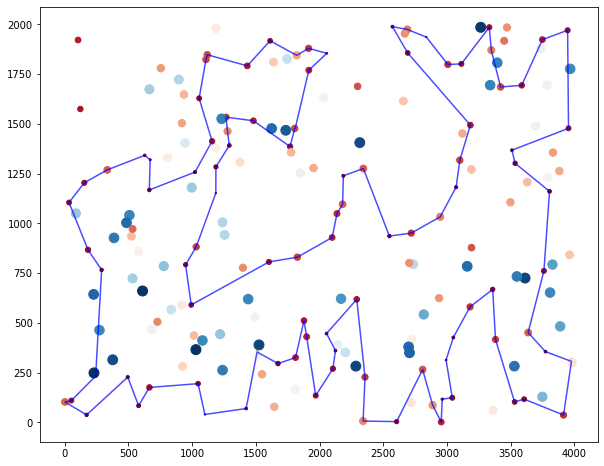

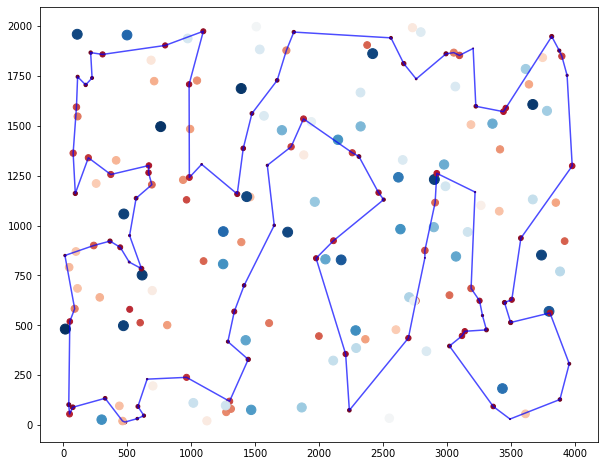

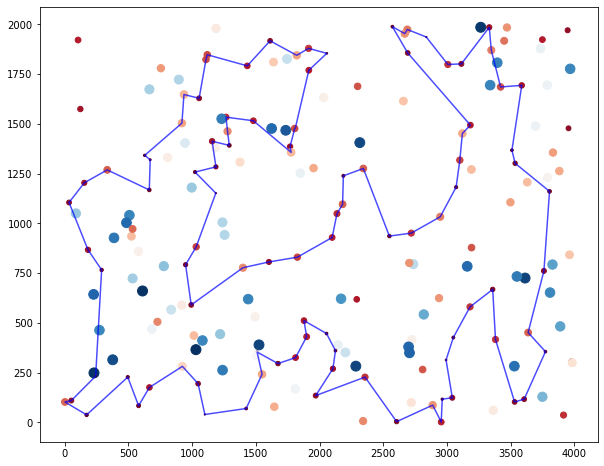

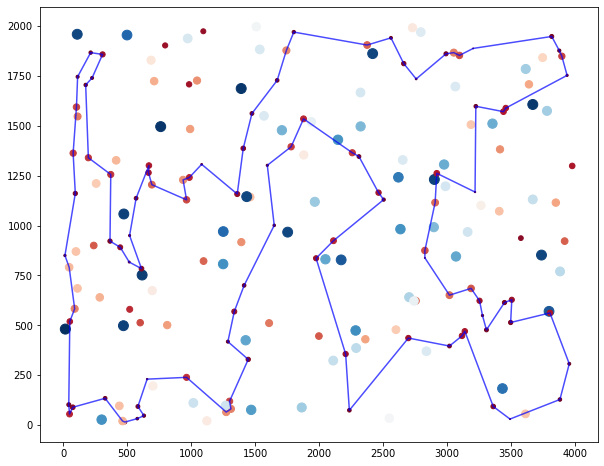

In [97]:
sim_mapping = {
    "common edges": common_edges,
    "common nodes": common_nodes
}

def generate_plots():
    instances = ['A', 'B', 'C', 'D']
    for instance in instances:
        plt.figure(figsize=(10,8))
        best_path = best_paths[instance]
        nodes, costs, D = read_data(f'TSP{instance}.csv')
        plot_path(best_path, nodes, costs)

generate_plots()



Plot nodes

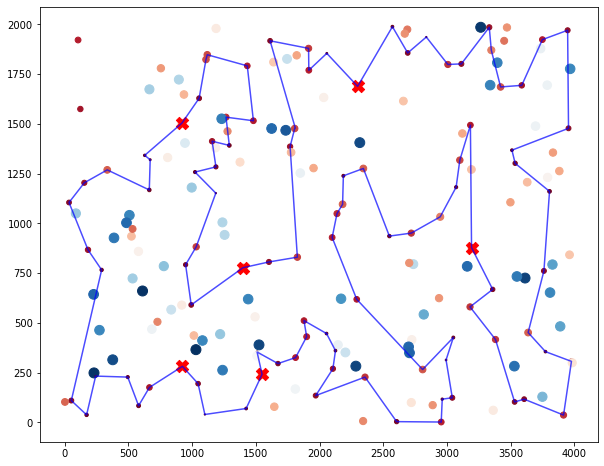

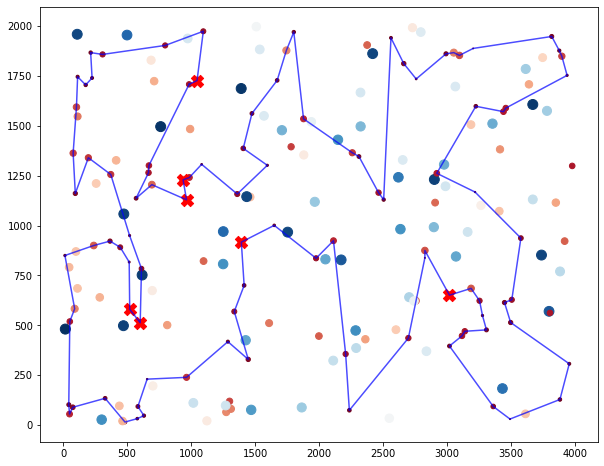

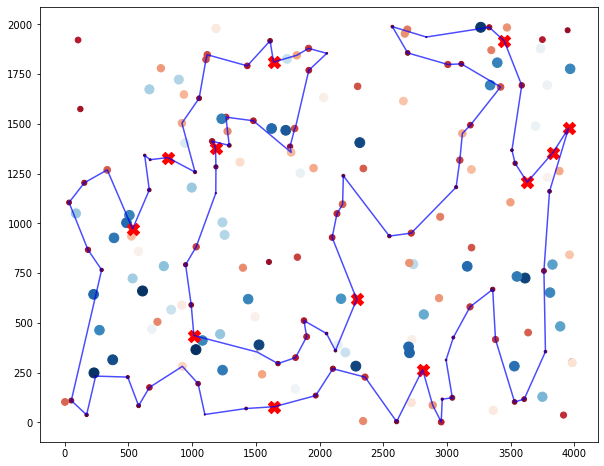

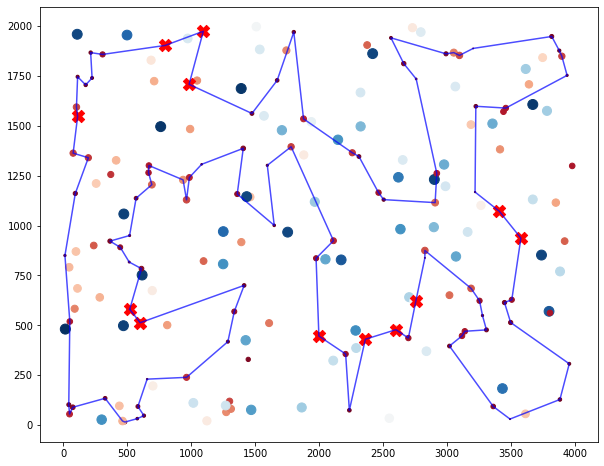

In [102]:
def plot_path_nodes(path, nodes, costs, marked_nodes=None):
    x_coords, y_coords, new_costs, path_x_coords, path_y_coords, colors = get_plot_values(nodes, path, costs)
    plt.scatter(x_coords, y_coords, color=colors, marker='o', s=new_costs, label='Cities')
    plt.plot(path_x_coords, path_y_coords, linestyle='-', marker='o', markersize=0, color='blue', label='Path', alpha=0.7)
    if marked_nodes is not None:
        marked_x_coords = [nodes[node][0] for node in marked_nodes]
        marked_y_coords = [nodes[node][1] for node in marked_nodes]
        plt.scatter(marked_x_coords, marked_y_coords, color='red', marker='X', s=150, label='Marked Nodes')
    plt.show()

def generate_plots():
    instances = ['A', 'B', 'C', 'D']
    for instance in instances:
        data = pd.read_csv(f'TSP{instance}_out.csv', sep=',')
        nodes, costs, D = read_data(f'TSP{instance}.csv')
        plt.figure(figsize=(10,8))
        paths = []
        scores = []
        for _, row in data.iterrows():
            str_path, score = row['Path'], row['Score']
            path = [int(x) for x in str_path[1:-1].split()]
            paths.append(path)
            scores.append(score)
        global_optimum = best_paths[instance]
        best_greedy_path = paths[np.argmin(scores)]
        marked_nodes = [x for x in range(len(D)) if x in best_greedy_path and x not in global_optimum]
        plot_path_nodes(best_greedy_path, nodes, costs, marked_nodes=marked_nodes)

generate_plots()

    

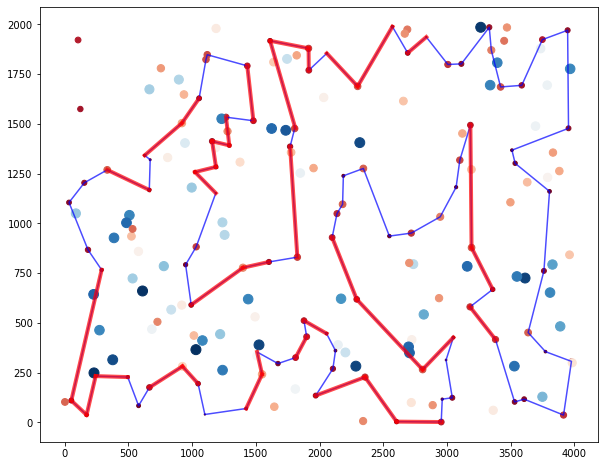

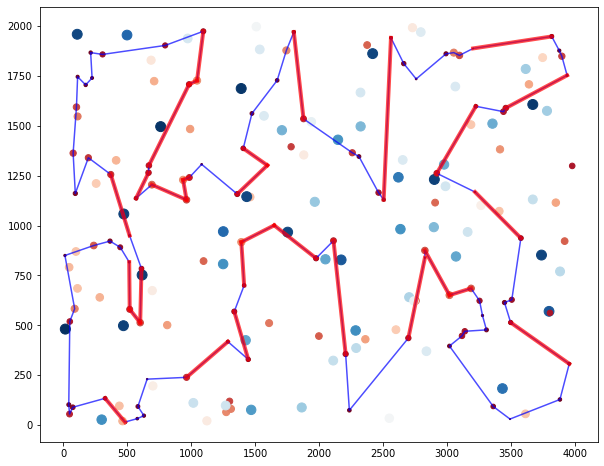

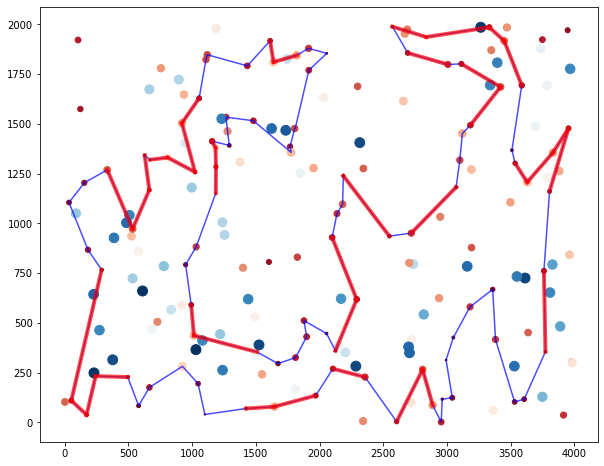

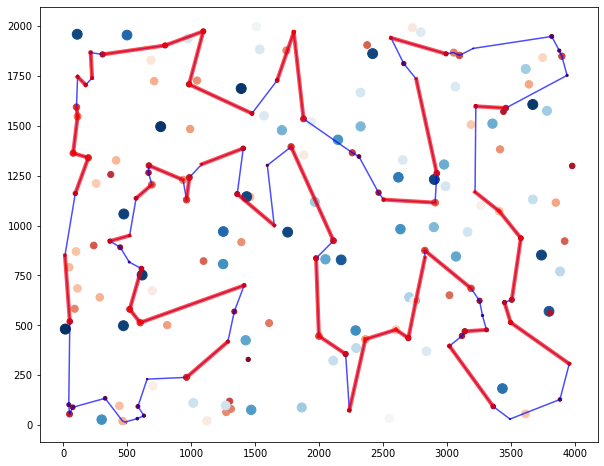

In [109]:
def plot_path_edges(path, nodes, costs, marked_nodes=None, marked_edges=None):
    x_coords, y_coords, new_costs, path_x_coords, path_y_coords, colors = get_plot_values(nodes, path, costs)
    plt.scatter(x_coords, y_coords, color=colors, marker='o', s=new_costs, label='Cities')
    plt.plot(path_x_coords, path_y_coords, linestyle='-', marker='o', markersize=0, color='blue', label='Path', alpha=0.7)

    # Plot marked nodes if provided
    if marked_nodes is not None:
        marked_x_coords = [nodes[node][0] for node in marked_nodes]
        marked_y_coords = [nodes[node][1] for node in marked_nodes]
        plt.scatter(marked_x_coords, marked_y_coords, color='red', marker='X', s=150, label='Marked Nodes')

    # Plot marked edges if provided
    if marked_edges is not None:
        for edge in marked_edges:
            edge_start, edge_end = edge
            edge_x_coords = [nodes[edge_start][0], nodes[edge_end][0]]
            edge_y_coords = [nodes[edge_start][1], nodes[edge_end][1]]
            plt.plot(edge_x_coords, edge_y_coords, linestyle='-', color='red', linewidth=4, alpha=0.7, label='Marked Edges')

    # plt.legend()
    plt.show()

def generate_plots():
    instances = ['A', 'B', 'C', 'D']
    for instance in instances:
        data = pd.read_csv(f'TSP{instance}_out.csv', sep=',')
        nodes, costs, D = read_data(f'TSP{instance}.csv')
        plt.figure(figsize=(10,8))
        paths = []
        scores = []
        for _, row in data.iterrows():
            str_path, score = row['Path'], row['Score']
            path = [int(x) for x in str_path[1:-1].split()]
            paths.append(path)
            scores.append(score)
        global_optimum = best_paths[instance]
        best_greedy_path = paths[np.argmin(scores)]
        marked_edges = []
        for idx, edge_start in enumerate(best_greedy_path):
            edge_end = best_greedy_path[(idx+1) % len(best_greedy_path)]
            if edge_start in global_optimum:
                e_idx = global_optimum.index(edge_start)
                if edge_end == global_optimum[(e_idx+1) % len(global_optimum)]:
                    pass
                elif edge_end == global_optimum[(e_idx-1) % len(global_optimum)]:
                    pass
                else:
                    marked_edges.append((edge_start, edge_end))
                    # marked_edges.append((edge_end, edge_start))
            else:
                marked_edges.append((edge_start, edge_end))
        plot_path_edges(best_greedy_path, nodes, costs, marked_edges=marked_edges)

generate_plots()